# "Data Science & Business Analytics Internnship" - The Spark Foundation

Batch: March23

# Sidra Tul Muntaha

## Project 02: To Predict the Optimum Number of Clusters for Iris Dataset & Represent it Visually.

### Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

### Loading Dataset

In [6]:
dataset = datasets.load_iris()

In [5]:
print(dir(dataset))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [61]:
df_X = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
df_Y = pd.DataFrame(data = dataset.target)

### Understanding Dataset

In [62]:
df_X.shape

(150, 4)

In [63]:
df_Y.shape

(150, 1)

In [68]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Finding the optimum number of clusters for k-means classification

C:\Users\sidratul.muntaha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


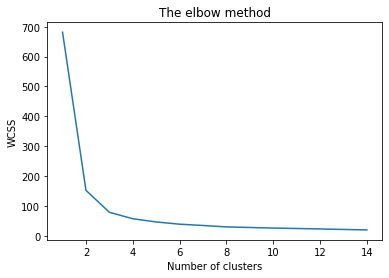

In [70]:
x = df_X.values
max_clusters = min(len(x), 15)

wcss = []
for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, max_clusters), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Fitting Model - KMeans

In [106]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)
centers = kmeans.cluster_centers_

### Visualizing Clusters

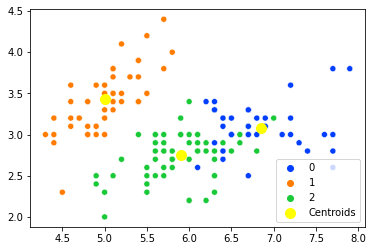

In [126]:
sns.scatterplot(x=x[:,0],y=x[:,1], hue=y_kmeans, palette='bright')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()